In [33]:
INPUT_SHAPE = (1400, 2100)
p_input = '/Users/yang.zhang/git/cld/input'

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [26]:
df = pd.read_csv('../input/train.csv')
df.shape

(22184, 2)

In [27]:
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [62]:
rle = df.EncodedPixels[df.EncodedPixels.notnull()].sample().values[0]

In [63]:
def rle2msk(rle, shape=INPUT_SHAPE):
    '''
    rle: run-length as string formatted (start length)
    shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')  # Needed to align to RLE direction

In [64]:
msk = rle2msk(rle)
msk

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

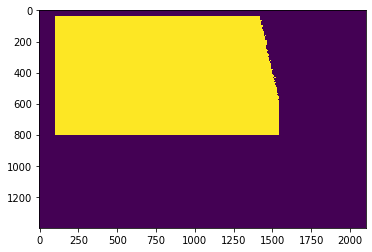

In [65]:
plt.imshow(msk);

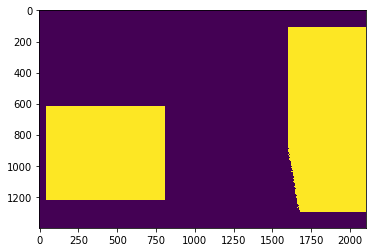

In [263]:
rle = df.EncodedPixels[df.EncodedPixels.notnull()].sample().values[0]
msk = rle2msk(rle)
plt.imshow(msk)
plt.show()

Number of objects is 2


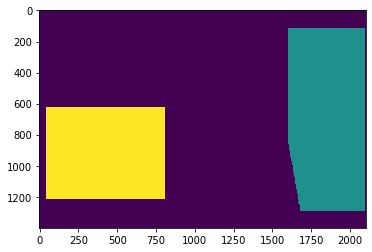

In [283]:
# https://stackoverflow.com/questions/16937158/extracting-connected-objects-from-an-image-in-python
from scipy import ndimage
blur_radius = 1.0
threshold = 0.5

# smooth the image (to remove small objects)
imgf = ndimage.gaussian_filter(msk, blur_radius)

# find connected components
labeled, nr_objects = ndimage.label(imgf > threshold) 
print("Number of objects is {}".format(nr_objects))

plt.imsave('/tmp/out.png', labeled)
plt.imshow(labeled)
plt.show()

Number of objects is 48


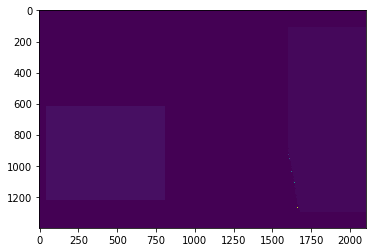

In [284]:
# https://stackoverflow.com/questions/16937158/extracting-connected-objects-from-an-image-in-python
from scipy import ndimage
# find connected components
labeled, nr_objects = ndimage.label(msk) 
print("Number of objects is {}".format(nr_objects))

plt.imsave('/tmp/out.png', labeled)
plt.imshow(labeled)

plt.show()

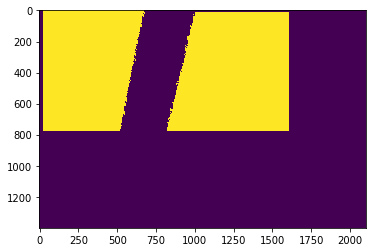

Number of objects is 3


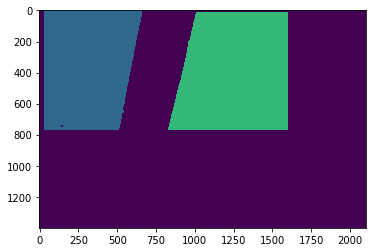

In [341]:
rle = df.EncodedPixels[df.EncodedPixels.notnull()].sample().values[0]
msk = rle2msk(rle)
plt.imshow(msk)
plt.show()
blur_radius = 1.0
threshold = 0.5

# smooth the image (to remove small objects)
imgf = ndimage.gaussian_filter(msk, blur_radius)

# find connected components
labeled, nr_objects = ndimage.label(imgf > threshold) 
print("Number of objects is {}".format(nr_objects))

plt.imshow(labeled)
plt.show()

In [342]:
labeled.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [346]:
Counter(labeled.flatten()), 

(Counter({0: 1995505, 1: 430453, 2: 514041, 3: 1}),)